In [ ]:
# Vanishing Gradients
# When more Activation functions added to Neural Networks, gradients of loss function approaches zero,Network hard to train
# gradient becomes negligible, subtracting it from original matrix doesn't make sense

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/GVinoth7/DL-MakeitSimple/blob/master/Keras_Vanishing_Gradient_Example.ipynb)

In [41]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform

%matplotlib inline
%autosave 10

class separation: 100%|██████████| 2/2 [00:00<00:00, 94.53it/s]


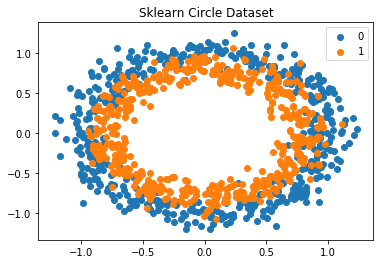

In [37]:
# Problem Definition

# Create a two different classes dataset
x,y = make_circles(n_samples= 1000, noise = 0.1, random_state=1)

for i in tqdm(range(2), desc='class separation'):
    sample_x = np.where(y==i)  # Colletection each class index
    plt.scatter(x[sample_x, 0], x[sample_x, 1], label = str(i))  # 
    
plt.legend()
plt.title('Sklearn Circle Dataset')
plt.show()  

In [40]:
# Make sure the data points are between -1 to 1
scaler = MinMaxScaler(feature_range= (-1, 1))   # default is 0 to 1
X = scaler.fit_transform(x)

# Splitting the Train test datasets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)  # Splitting the train and test as 70%- 30 %

In [73]:
# Desinging a model

model = Sequential()  
init  = RandomUniform(minval=0, maxval=1)

# Dense - Structure (output, input, activation, initialization)
model.add(Dense(5, input_dim =2, activation = 'tanh', kernel_initializer = init ))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init ))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init ))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init ))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init ))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = init))

# compile model
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='mean_squared_error', optimizer = opt, metrics = ['accuracy'])

# Fit the model
his = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 500, verbose =0) #Verbose{0,1,2}way of output

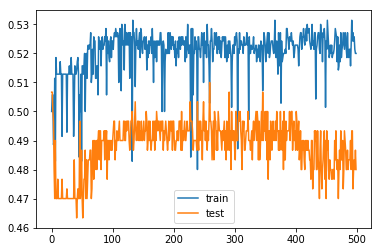

In [74]:
plt.plot(his.history['acc'], label = 'train')
plt.plot(his.history['val_acc'], label = 'test')
plt.legend()
# It seems doesn't learn more after 500 epochs - Example of Vanishing gradients

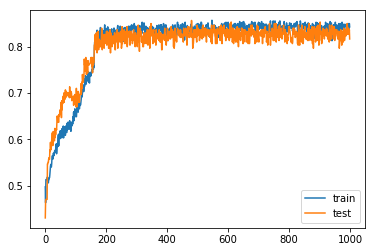

In [76]:
# Desinging a model with relu

model = Sequential()  
init  = RandomUniform(minval=0, maxval=1)

# Dense - Structure (output, input, activation, initialization)
model.add(Dense(5, input_dim =2, activation = 'relu', kernel_initializer = init ))
model.add(Dense(5, activation = 'relu', kernel_initializer = init ))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = init))  # Binary - Sigmoid   Multiple - Softmax

# compile model
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Fit the model
his = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 1000, verbose =0) #Verbose{0,1,2}way of output

plt.plot(his.history['acc'], label = 'train')
plt.plot(his.history['val_acc'], label = 'test')
plt.legend()

Inspirations:  (Vanishing-gradient)[https://hackernoon.com/exploding-and-vanishing-gradient-problem-math-behind-the-truth-6bd008df6e25]  \br
(Code-reference)[https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/]
